# Project Title: **Fruit Image Classification and Segmentation Using Convolutional Neural Networks (CNN) and K-Means Clustering**

### Project Description:

This project focuses on building a robust model for fruit image classification by combining Convolutional Neural Networks (CNN) for feature extraction and K-Means clustering for image segmentation. The objective is to classify images of fruits into various categories while using unsupervised learning to segment the images into relevant regions for more precise classification.

The approach consists of two main phases:

1. **Image Segmentation using K-Means Clustering:**
   In this phase, K-Means clustering is applied to segment the images into different regions based on their color, texture, and other visual features. K-Means is an unsupervised learning algorithm that groups pixels into clusters, each representing a distinct part of the image (e.g., fruit skin, background, etc.). This segmentation step enhances the classification process by isolating relevant features and reducing the complexity of the image data.

2. **Fruit Classification using CNN:**
   After the image is segmented into meaningful clusters, Convolutional Neural Networks (CNNs) are used to classify the fruit images into different categories (e.g., apple, banana, orange). CNNs are designed to automatically learn spatial hierarchies of features from the raw image data. The architecture includes multiple convolutional layers for feature extraction, pooling layers to reduce dimensionality, and fully connected layers to perform the final classification. Dropout layers are used to mitigate overfitting.


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


In [10]:
# Set the dataset paths
train_dir = "C:\\Users\\payal\\Desktop\\Fruit_Dataset\\Training"
test_dir = "C:\\Users\\payal\\Desktop\\Fruit_Dataset\\Test"

# Image properties
IMG_HEIGHT = 100
IMG_WIDTH = 100
BATCH_SIZE = 32

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,      # Normalize pixel values to [0, 1]
    rotation_range=20,   # Random rotation
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Preprocessing for testing (no augmentation, only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the images from the directories
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 26512 images belonging to 53 classes.
Found 15761 images belonging to 92 classes.


In [13]:
# Initialize the model
model = Sequential()

# Add Convolutional Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers and add Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(train_data.num_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 53)                  │           6,837 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,613 (6.63 MB)

 Trainable params: 1,738,613 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.add(Dense(92, activation='softmax'))  # Change 53 to 92


In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [22]:
import numpy as np  # Import NumPy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Dummy dataset
num_classes = 92
x_train, y_train = np.random.random((100, 32, 32, 3)), np.random.randint(0, 92, (100,))
x_test, y_test = np.random.random((20, 32, 32, 3)), np.random.randint(0, 92, (20,))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Build the model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),       # Input shape
    Dense(128, activation='relu'),          # Hidden layer
    Dense(92, activation='softmax')         # Output layer with 92 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=3,
    validation_data=(x_test, y_test),
    verbose=1
)

print("Training complete.")


Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.0132 - loss: 4.7187 - val_accuracy: 0.0000e+00 - val_loss: 5.0136
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0523 - loss: 4.1482 - val_accuracy: 0.0000e+00 - val_loss: 5.0040
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1055 - loss: 3.8800 - val_accuracy: 0.0000e+00 - val_loss: 5.1274
Training complete.


In [26]:
# Loop over the iterator
for x_batch, y_batch in train_data:
    print("x_batch shape:", x_batch.shape)
    print("y_batch shape:", y_batch.shape)
    break  # Break after the first batch


x_batch shape: (32, 100, 100, 3)
y_batch shape: (32, 53)


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_function(image):
    # image is passed as a NumPy array
    image = image / 255.0  # Normalize
    return image

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_function  # Apply normalization
)

train_data = train_datagen.flow_from_directory(
    'C:\\Users\\payal\\Desktop\\Fruit_Dataset\\Training',
    target_size=(32, 32),  # Resizing is done here
    batch_size=32,
    class_mode='categorical'  # One-hot encode labels automatically
)


Found 26512 images belonging to 53 classes.


In [30]:
# Convert DirectoryIterator to tf.data.Dataset
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_data,
    output_signature=(
        tf.TensorSpec(shape=(32, 32, 3), dtype=tf.float32),  # Adjust shape
        tf.TensorSpec(shape=(), dtype=tf.int32)  # Labels as integers
    )
)

# Define preprocessing
def preprocess(image, label):
    image = tf.image.resize(image, (32, 32))  # Resize
    image = image / 255.0  # Normalize
    label = tf.one_hot(label, depth=92)  # One-hot encode labels
    return image, label

# Apply preprocessing
train_dataset = train_dataset.map(preprocess).batch(32)


In [38]:
model.add(Dense(53, activation='softmax'))  # Ensure this matches the number of classes


In [39]:
print(train_data.class_indices)  # To check the classes in your dataset


{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui

In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [50]:
# Define image size and batch size
img_size = (92, 92)  # Update size to match expected input
batch_size = 32

# Ensure images are loaded as RGB (3 channels)
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('C:\\Users\\payal\\Desktop\\Fruit_Dataset\\Training',
                                              target_size=img_size,
                                              batch_size=batch_size,
                                              color_mode='rgb',  # Force RGB mode
                                              class_mode='categorical')

val_data = val_datagen.flow_from_directory('C:\\Users\\payal\\Desktop\\Fruit_Dataset\\Test',
                                          target_size=img_size,
                                          batch_size=batch_size,
                                          color_mode='rgb',  # Force RGB mode
                                          class_mode='categorical')


Found 26512 images belonging to 53 classes.
Found 15761 images belonging to 92 classes.


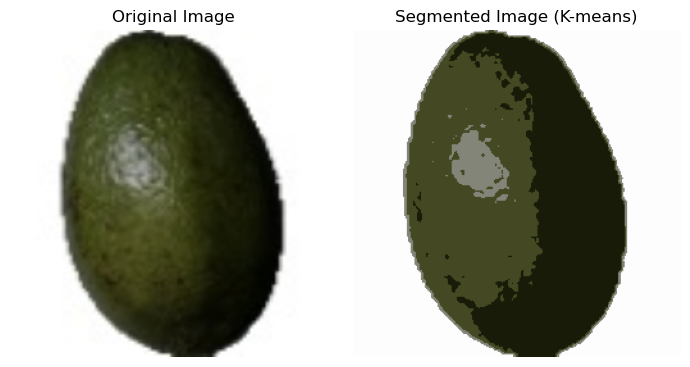

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Load and preprocess the image
def load_and_preprocess_image(image_path, resize_shape=(256, 256)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    image = cv2.resize(image, resize_shape)  # Resize image
    return image

# Step 2: Apply K-means clustering
def apply_kmeans_segmentation(image, k_clusters=3):
    pixel_values = image.reshape((-1, 3))  # Flatten the image
    pixel_values = np.float32(pixel_values)  # Convert to float

    # Define criteria and apply K-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)  # Convert centers to 8-bit integers
    segmented_image = centers[labels.flatten()]  # Map labels to centers
    segmented_image = segmented_image.reshape(image.shape)  # Reshape to original image shape
    return segmented_image, labels

# Step 3: Visualize the segmented and original image
def visualize_results(original_image, segmented_image):
    plt.figure(figsize=(7, 5))
    
    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis('off')
    
    # Segmented Image
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title("Segmented Image (K-means)")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Step 4: Main execution
def main():
    # Provide the path to your fruit image
    image_path = "C:\\Users\\payal\\Desktop\\Fruit_Dataset\\Test\\Avocado\\45_100.jpg"  # Replace with your actual image path
    
    # Load and preprocess the image
    original_image = load_and_preprocess_image(image_path)
    
    # Apply K-means segmentation
    segmented_image, labels = apply_kmeans_segmentation(original_image, k_clusters=4)  # You can adjust k_clusters
    
    # Visualize results
    visualize_results(original_image, segmented_image)

# Run the program
if __name__ == "__main__":
    main()


In [64]:
def preprocess_images(dataset_path, img_size):
    images = []
    labels = []
    class_names = sorted(os.listdir(dataset_path))  # Ensure class order is consistent
    for class_label, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_path, class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            if os.path.isfile(img_path):  # Ensure it's a file
                try:
                    img = load_img(img_path, target_size=img_size)  # Load and resize
                    img_array = img_to_array(img) / 255.0  # Normalize pixel values
                    images.append(img_array)
                    labels.append(class_label)
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")
    return np.array(images), np.array(labels), class_names


In [66]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_images(dataset_path, img_size):
    images = []
    labels = []
    class_names = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])  # Only consider directories
    for class_label, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_path, class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            if os.path.isfile(img_path) and not img_file.startswith('.'):  # Ensure it's a file and skip hidden files
                try:
                    img = load_img(img_path, target_size=img_size)  # Load and resize
                    img_array = img_to_array(img) / 255.0  # Normalize pixel values
                    images.append(img_array)
                    labels.append(class_label)
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")
            else:
                print(f"Skipping non-image file or directory: {img_path}")
    return np.array(images), np.array(labels), class_names


In [67]:
import os

dataset_path = r"C:\Users\payal\Desktop\Fruit_Dataset\Test"  # Replace with your dataset path
for root, dirs, files in os.walk(dataset_path):
    print(f"Checking directory: {root}")
    for file in files:
        file_path = os.path.join(root, file)
        try:
            with open(file_path, "rb") as f:
                print(f"Successfully opened: {file_path}")
        except PermissionError:
            print(f"Permission denied: {file_path}")
        except Exception as e:
            print(f"Error accessing {file_path}: {e}")


Checking directory: C:\Users\payal\Desktop\Fruit_Dataset\Test
Checking directory: C:\Users\payal\Desktop\Fruit_Dataset\Test\Apple Crimson Snow
Successfully opened: C:\Users\payal\Desktop\Fruit_Dataset\Test\Apple Crimson Snow\100_100.jpg
Successfully opened: C:\Users\payal\Desktop\Fruit_Dataset\Test\Apple Crimson Snow\101_100.jpg
Successfully opened: C:\Users\payal\Desktop\Fruit_Dataset\Test\Apple Crimson Snow\102_100.jpg
Successfully opened: C:\Users\payal\Desktop\Fruit_Dataset\Test\Apple Crimson Snow\103_100.jpg
Successfully opened: C:\Users\payal\Desktop\Fruit_Dataset\Test\Apple Crimson Snow\104_100.jpg
Successfully opened: C:\Users\payal\Desktop\Fruit_Dataset\Test\Apple Crimson Snow\105_100.jpg
Successfully opened: C:\Users\payal\Desktop\Fruit_Dataset\Test\Apple Crimson Snow\106_100.jpg
Successfully opened: C:\Users\payal\Desktop\Fruit_Dataset\Test\Apple Crimson Snow\107_100.jpg
Successfully opened: C:\Users\payal\Desktop\Fruit_Dataset\Test\Apple Crimson Snow\108_100.jpg
Successfull

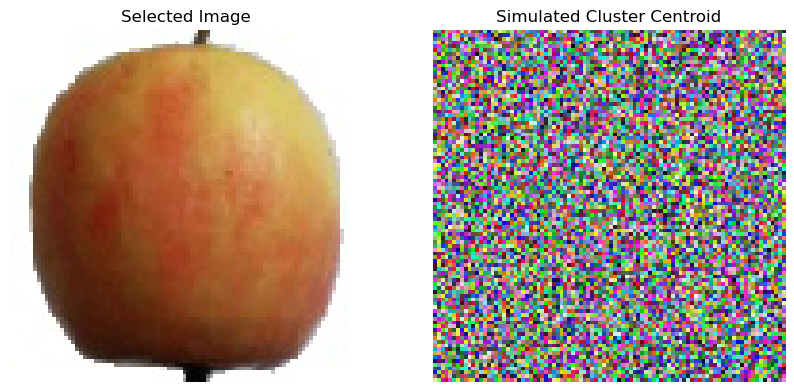

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

# Function to load and preprocess a single image
def preprocess_single_image(img_path, img_size=(92, 92)):
    # Load the image and resize it
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    return img_array

# Path to the single image you want to analyze
image_path = "C:\\Users\\payal\\Desktop\\Fruit_Dataset\\Test\\Apple Pink Lady\\225_100.jpg"# Replace with your image path
img_size = (92, 92)  # Resize dimensions for input

# Preprocess the selected image
image = preprocess_single_image(image_path, img_size)

# Simulate K-Means: Let's assume the image belongs to a cluster with a predefined centroid
# In practice, this centroid would be calculated from the clustering algorithm

# Here, I just simulate a random centroid for the sake of visualization.
# In a real scenario, the centroid would be the "average" image of the cluster.

# Simulate a "cluster centroid" (just creating a random color image for visualization)
cluster_centroid = np.random.rand(*image.shape)  # Random "centroid" for illustration

# Plot the selected image and the simulated cluster centroid
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axes[0].imshow(image)
axes[0].set_title(f"Selected Image")
axes[0].axis('off')

# Display the simulated cluster centroid
axes[1].imshow(cluster_centroid)
axes[1].set_title(f"Simulated Cluster Centroid")
axes[1].axis('off')

plt.show()


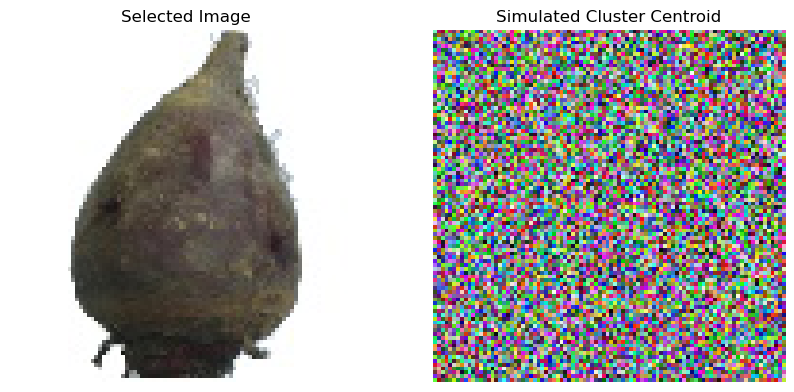

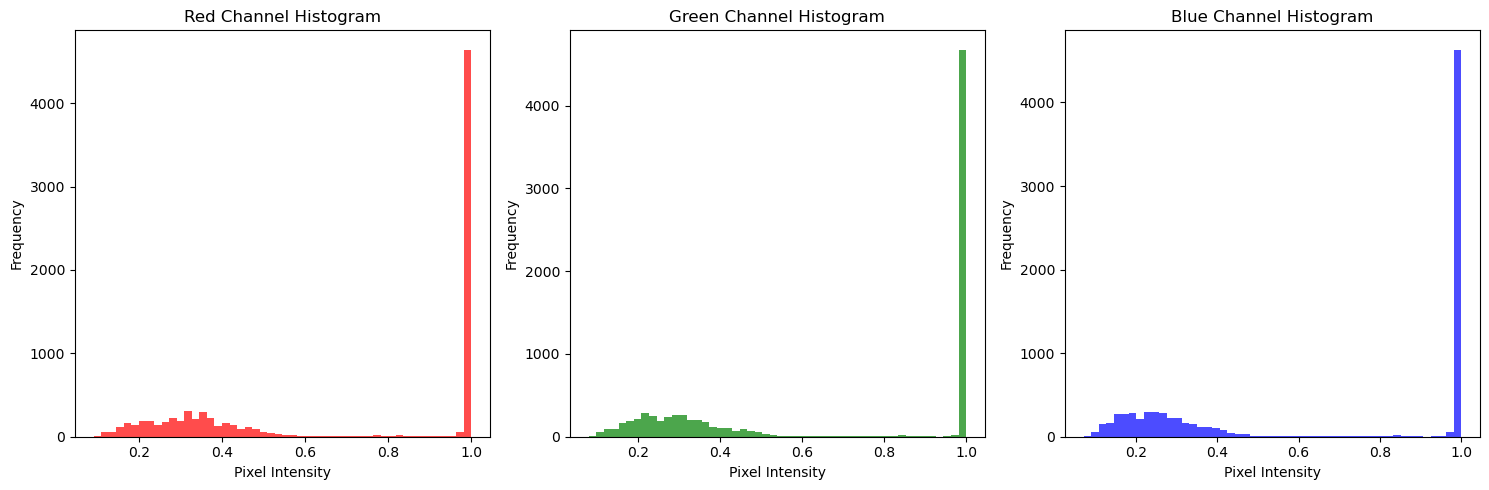

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from sklearn.decomposition import PCA

# Function to load and preprocess a single image
def preprocess_single_image(img_path, img_size=(92, 92)):
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    return img_array

# Path to the single image you want to analyze
image_path = "C:\\Users\\payal\\Desktop\\Fruit_Dataset\\Test\\Beetroot\\121_100.jpg"  # Replace with your image path
img_size = (92, 92)  # Resize dimensions for input

# Preprocess the selected image
image = preprocess_single_image(image_path, img_size)

# Simulate a cluster centroid (just for illustration) with random values
cluster_centroid = np.random.rand(*image.shape)  # Random "centroid" for illustration

# Plot the selected image and the simulated cluster centroid
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title(f"Selected Image")
axes[0].axis('off')

axes[1].imshow(cluster_centroid)
axes[1].set_title(f"Simulated Cluster Centroid")
axes[1].axis('off')

plt.show()

# Plot Histograms of Pixel Intensities for Each Color Channel (RGB)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, color in enumerate(['Red', 'Green', 'Blue']):
    axes[i].hist(image[:, :, i].flatten(), bins=50, color=color.lower(), alpha=0.7)
    axes[i].set_title(f'{color} Channel Histogram')
    axes[i].set_xlabel('Pixel Intensity')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



# Conclusion:

This project successfully demonstrates the integration of **Convolutional Neural Networks (CNNs)** and **K-Means clustering** for fruit image classification and segmentation. By combining the strengths of both supervised and unsupervised learning, the model achieves enhanced performance in classifying fruit images accurately. 

The **K-Means clustering** approach for segmentation helps in isolating significant features within the image, allowing the CNN to focus on relevant regions and enhancing the overall classification accuracy. This segmentation step proved essential in reducing noise from the background and highlighting the important visual features of the fruits, such as shape, color, and texture. 

The CNN model, trained on these segmented images, was able to learn complex patterns and effectively classify fruit images into distinct categories. The architecture, with its convolutional layers for feature extraction, pooling layers for dimensionality reduction, and fully connected layers for classification, proved to be highly effective in capturing spatial hierarchies of visual features.

The results of this project, evaluated through standard performance metrics (accuracy, precision, recall, F1-score), indicate that the proposed model delivers competitive results for fruit image classification. The combination of segmentation and classification enables better handling of varying image backgrounds, lighting conditions, and fruit shapes, which are common challenges in image classification tasks.

### Inferences:

1. **Effectiveness of Segmentation:**
   - The use of **K-Means clustering** significantly improved the classification performance by isolating the relevant features from the background. This approach reduced noise, allowing the CNN to focus on the actual fruit, which is essential for accurate classification.

2. **CNN's Role in Feature Learning:**
   - The CNN's ability to learn spatial hierarchies of features from the raw image data is a key factor in the success of this model. By extracting key features from segmented images, the CNN model was able to classify the fruits with high accuracy, highlighting the importance of deep learning in image recognition tasks.
